Y - national income 
R - interest

In [209]:
%matplotlib inline

import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-white')
plt.rcParams['figure.dpi'] = 100

In [210]:
# Jupyter Specifics
from IPython.display import HTML
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

%matplotlib inline

style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

In [211]:
model_params = {
     "α_M": 0.8, #Proportion of money in use
    "beta_12": 1, #
    "beta_1": 0.49,
    "beta_2": 0.49,
    "beta_3": 1.1,
    "l1": 0.1,
    "l2": 2,
    "y0": 0.9 ,
    "r0": 0.1,
    "alfa": 0.5,
    "beta": 1.1,
    "l_s": 0.1 # M( constant money supply)
    
}
"""
    "α_M": 0.8, #Proportion of money in use
    "beta_12": 1, #
    "beta_1": 0.49,
    "beta_2": 0.49,
    "beta_3": 1.1,
    "l1": 0.1,
    "l2": 2,
    "y0": 0.9 ,
    "r0": 0.1,
    "alfa": 0.5,
    "beta": 1.1,
    "l_s": 0.1 # M( constant money supply)
"""

'\n    "α_M": 0.8, #Proportion of money in use\n    "beta_12": 1, #\n    "beta_1": 0.49,\n    "beta_2": 0.49,\n    "beta_3": 1.1,\n    "l1": 0.1,\n    "l2": 2,\n    "y0": 0.9 ,\n    "r0": 0.1,\n    "alfa": 0.5,\n    "beta": 1.1,\n    "l_s": 0.1 # M( constant money supply)\n'

In [212]:
def I(y, r):
    return 1/(1+math.exp(-y)) - model_params["beta_1"] * r

def S(y, r):
    return (model_params['l1'] * y) + (model_params["beta_2"] * r)

def L(y, r):
    return (model_params["l2"] * y) - (model_params["beta_3"] * r)

def Keyness_model(y_prev, r_prev):
    i = I(y_prev, r_prev)
    y = model_params["alfa"] * (I(y_prev, r_prev) - S(y_prev, r_prev))
    r = model_params["beta"]* (L(y_prev, r_prev) - model_params["l_s"])
    return y, r, i

In [213]:
Y = [model_params["y0"]]
R = [model_params["r0"]]
I2 = []
T=100
for dt in range(0, T):
    y, r, i = Keyness_model(Y[dt], R[dt])
    Y.append(y)
    R.append(r)
    I2.append(i)
    print(Y)
    print(R)
    print(I2)
    print(" - ")


    

[0.9, 0.2614747513125019]
[0.1, 1.7489999999999999]
[0.6619495026250038]
 - 
[0.9, 0.2614747513125019, -0.5875843457047532]
[0.1, 1.7489999999999999, -1.651045547112496]
[0.6619495026250038, -0.2920112162782562]
 - 
[0.9, 0.2614747513125019, -0.5875843457047532, 1.0169861900310728]
[0.1, 1.7489999999999999, -1.651045547112496, 0.5950795514556635]
[0.6619495026250038, -0.2920112162782562, 1.1662016274065472]
 - 
[0.9, 0.2614747513125019, -0.5875843457047532, 1.0169861900310728, 0.024754275405331594]
[0.1, 1.7489999999999999, -1.651045547112496, 0.5950795514556635, 1.4073233608070073]
[0.6619495026250038, -0.2920112162782562, 1.1662016274065472, 0.4427961500270456]
 - 
[0.9, 0.2614747513125019, -0.5875843457047532, 1.0169861900310728, 0.024754275405331594, -0.4377320341384779]
[0.1, 1.7489999999999999, -1.651045547112496, 0.5950795514556635, 1.4073233608070073, -1.7584018606847498]
[0.6619495026250038, -0.2920112162782562, 1.1662016274065472, 0.4427961500270456, -0.18340019394098905]
 - 

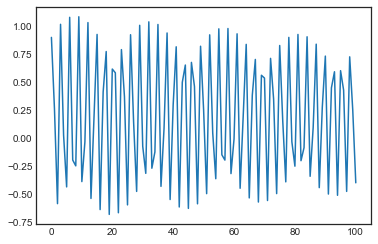

In [214]:
plt.plot(Y)

In [232]:
def main(alfa, beta):
    
    def I(y, r):
        return 1/(1+math.exp(-y)) - model_params["beta_1"] * r

    def S(y, r):
        return (model_params['l1'] * y) + (model_params["beta_2"] * r)

    def L(y, r):
        return (model_params["l2"] * y) - (model_params["beta_3"] * r)

    def Keyness_model(y_prev, r_prev):
        y = alfa * (I(y_prev, r_prev) - S(y_prev, r_prev))
        r = beta* (L(y_prev, r_prev) - model_params["l_s"])
        return y, r

    Y = [model_params["y0"]]
    R = [model_params["r0"]]
    I2 = []
    T=100
    for dt in range(0, T):
        y, r = Keyness_model(Y[dt], R[dt])
        Y.append(y)
        R.append(r)

    
    time = np.linspace(0, T,101)
    solution = Y
    solution2 = R
    #Graphic details
    fig, ax = plt.subplots(figsize=(15, 10))

    ax.plot(time, Y, label='Y')
    ax.plot(time, R, label='R')

   

    #ax.set_xticklabels(np.arange(0, T + 1, 1, dtype=np.int))
    #ax.set_xticks(np.arange(0, T + 1, 1))

    #ax.set_yticks(np.arange(0, initial_salary * 1.1, initial_salary / 20))

    #ax.set_xlim([0, days])
    #ax.set_ylim([0, initial_salary * 1.1])
    #ax.set_xlabel('Days')
    #ax.set_ylabel('Capital $')
    ax.legend(loc='best')
    ax.grid()

    plt.show()

interact(main, alfa=FloatSlider(min=0, max=1, step=0.01, value=0.5, description='alfa', style=style, layout=slider_layout),
               beta=FloatSlider(min=0, max=1.5, step=0.01, value=1.1, description='beta', style=style, layout=slider_layout)
               #savings_ratio=FloatSlider(min=0, max=1, step=0.01, value=0.2, description='Savings Ratio', style=style, layout=slider_layout),
               #extraordinary_expenses=FloatSlider(min=0, max=1, step=0.005, description='Extraordinary Expenses', style=style, value=0.3, layout=slider_layout),
               #fixed_costs=IntSlider(min=1, max=1000, step=1, value=100, description='Fixed Costs', style=style, layout=slider_layout),
               #days=IntSlider(min=1, max=600, step=5, value=30, description='Total Number of Days', style=style, layout=slider_layout)
        );

interactive(children=(FloatSlider(value=0.5, description='alfa', layout=Layout(width='99%'), max=1.0, step=0.0…